### Just the report parts of the clean and projection scripts
probably should move them out of notebooks altogether and into regular .py

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from string import Template

In [2]:
df = pd.read_csv("data-kDl1L.csv",parse_dates=True)

In [3]:
df["Date"] = pd.to_datetime(df["Date"],infer_datetime_format=True)

In [4]:
df.set_index("Date",inplace=True)

In [5]:
df[-7:].agg(['mean','std','min','max','count'])

,Statewide total,Oahu,Hawaii island,Maui,Kauai,Molokai,Outside Hawaii
mean,83.857143,66.285714,15.428571,0.571429,0.142857,0.0,1.428571
std,20.570436,17.065699,5.652644,0.786796,0.377964,0.0,1.397276
min,39.000000,31.000000,7.000000,0.000000,0.000000,0.0,0.000000
max,100.000000,81.000000,24.000000,2.000000,1.000000,0.0,4.000000
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000


In [6]:
df.tail(7)

,Statewide total,Oahu,Hawaii island,Maui,Kauai,Molokai,Outside Hawaii
Date,,,,,,,
2020-10-14,100.0,80,18,1,0,0.0,1.0
2020-10-15,90.0,74,13,1,0,0.0,2.0
2020-10-16,89.0,69,20,0,0,0.0,0.0
2020-10-17,96.0,81,12,0,1,0.0,2.0
2020-10-18,82.0,68,14,0,0,0.0,0.0
2020-10-19,39.0,31,7,0,0,0.0,1.0
2020-10-20,91.0,61,24,2,0,0.0,4.0


In [7]:
#collect tables for html report -- be nice to get this all in one place. Maybe as an object that gets updated 
#as we collect stuff and then updatest the html at the end of the script?

#statsHtml = df[['Statewide total','Oahu','Hawaii island','Maui','Kauai','Outside Hawaii']].tail(7).describe().to_html(classes="mystyle",float_format='{:10.1f}'.format)
statsHtml = df[['Statewide total','Oahu','Hawaii island','Maui','Kauai','Outside Hawaii']][-7:].agg(['mean','std','min','max']).to_html(classes="mystyle",float_format='{:10.1f}'.format)
recsHtml = df.rename_axis(index=None,columns='Date')[['Statewide total','Oahu','Hawaii island','Maui','Kauai','Outside Hawaii']].tail(7).to_html(classes="mystyle",float_format='{:10.0f}'.format)


Add lines similar to the DOH's per 100k bounds for the total population of the state (1,415,872 according to https://www.census.gov/quickfacts/HI)

DOH per 100k https://health.hawaii.gov/coronavirusdisease2019/school-guidance/
low       2.0 -> 28.3
medium    5.0 -> 70.8
high     10.4 -> 147.3 
critical 15.5 -> 219.5



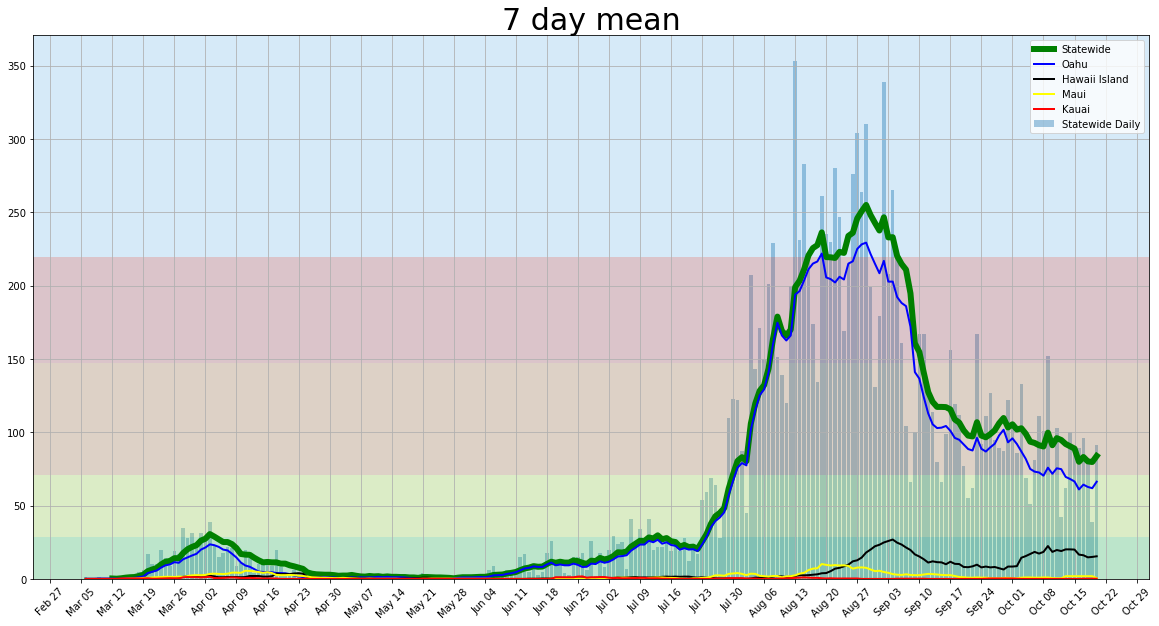

In [8]:
#plot all counties
fig, ax = plt.subplots(figsize=(20,10))

ax.bar(df.index, df['Statewide total'], label="Statewide Daily", alpha=0.4)
ax.plot(df.index, df['Statewide total'].rolling(7).mean(),color='green', linewidth=6, label="Statewide")
ax.plot(df.index, df['Oahu'].rolling(7).mean(), color='blue', linewidth=2, label="Oahu")
ax.plot(df.index, df['Hawaii island'].rolling(window=7).mean(), color='black', linewidth=2, label="Hawaii Island")
ax.plot(df.index, df['Maui'].rolling(window=7).mean(), color='yellow', linewidth=2, label="Maui")
ax.plot(df.index, df['Kauai'].rolling(window=7).mean(), color='red', linewidth=2, label="Kauai")
#not showing "Outsied Hawaii"

#plot some areas for school guidence
ax.axhspan(0.0, 28.3, facecolor='#56d217',zorder=1,alpha=0.2)
ax.axhspan(28.3, 70.8, facecolor='#f0f502',zorder=1,alpha=0.2)
ax.axhspan(70.8, 147.3, facecolor='#fe7000',zorder=1,alpha=0.2)
ax.axhspan(147.3, 219.5, facecolor='#f32c13',zorder=1,alpha=0.2)

ax.set_facecolor('#d6eaf8')

ax.set_ylim(ymin=0)

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.TH))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#rotate x axis labels
plt.xticks(rotation=45)
plt.title('7 day mean', fontdict = {'fontsize' : 30})
#grid
ax.grid()
ax.legend()
fig.savefig('publish/means.png');

In [9]:
popOahu = 974563 / 100000
popMolokai = 7345 /100000
popHawaii = 201513 /100000
popMaui = 144444 /100000
popLanai = 3135 /100000
popKauai = 72293 /100000

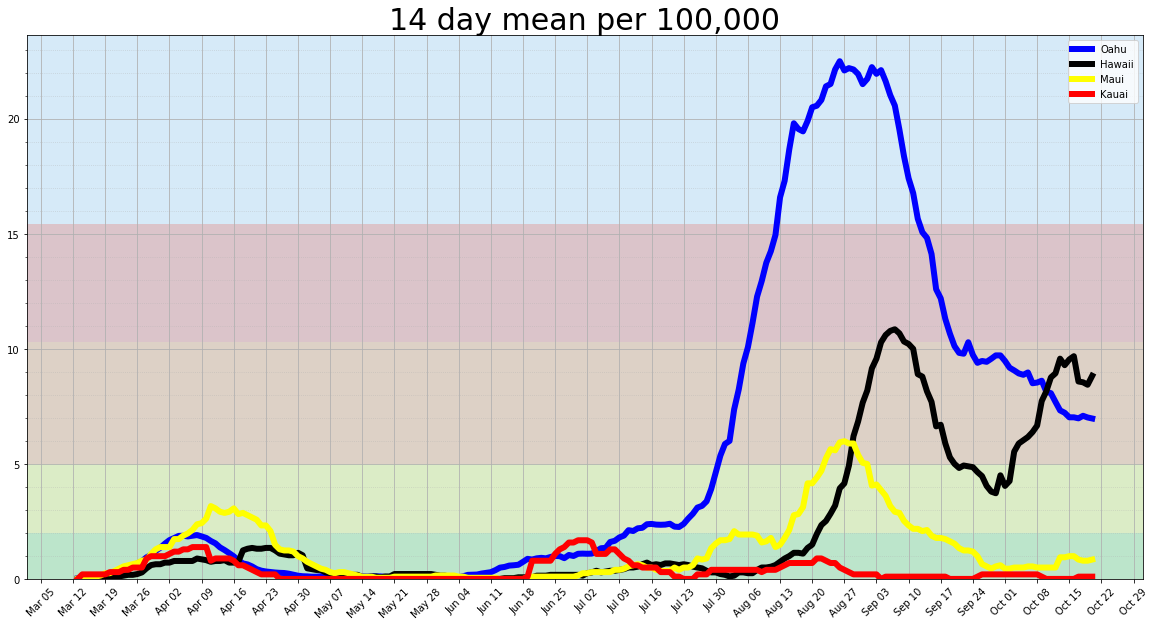

In [10]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(df.index, (df['Oahu'] / popOahu).rolling(window=14).mean(), color='blue', linewidth=6, label="Oahu")
ax.plot(df.index, (df['Hawaii island'] / popHawaii).rolling(window=14).mean(), color='black', linewidth=6, label="Hawaii")
ax.plot(df.index, (df['Maui'] / popMaui).rolling(window=14).mean(), color='yellow', linewidth=6, label="Maui")
ax.plot(df.index, (df['Kauai'] / popKauai).rolling(window=14).mean(), color='red', linewidth=6, label="Kauai")

#plot some areas for school guidence
ax.axhspan(0.0, 2.0, facecolor='#56d217',zorder=1,alpha=0.2)
ax.axhspan(2.0, 5.0, facecolor='#f0f502',zorder=1,alpha=0.2)
ax.axhspan(5.0, 10.3, facecolor='#fe7000',zorder=1,alpha=0.2)
ax.axhspan(10.3, 15.4, facecolor='#f32c13',zorder=1,alpha=0.2)
#ax.axhspan(15.3, ax.get_ybound()[1], facecolor='#8326d7',alpha=0.2)

ax.set_facecolor('#d6eaf8')

ax.set_ylim(ymin=0)

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.TH))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#rotate x axis labels
plt.xticks(rotation=45)

# Initialize minor ticks
ax.minorticks_on()

# Now minor ticks exist and are turned on for both axes

# Turn off x-axis minor ticks
ax.xaxis.set_tick_params(which='minor', bottom=False)

#grid
ax.grid()
ax.grid(which='minor',axis='y',linestyle='dotted',alpha=0.5)
plt.title('14 day mean per 100,000', fontdict = {'fontsize' : 30})
ax.legend()
fig.savefig('publish/population14day.png');

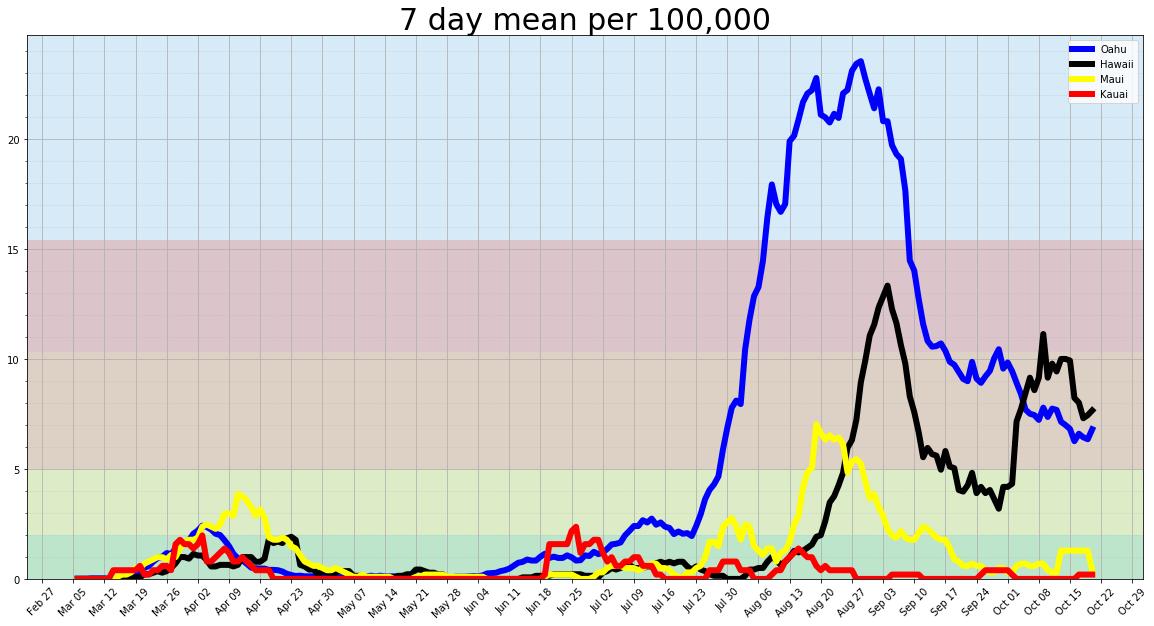

In [11]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(df.index, (df['Oahu'] / popOahu).rolling(window=7).mean(), color='blue', linewidth=6, label="Oahu")
ax.plot(df.index, (df['Hawaii island'] / popHawaii).rolling(window=7).mean(), color='black', linewidth=6, label="Hawaii")
ax.plot(df.index, (df['Maui'] / popMaui).rolling(window=7).mean(), color='yellow', linewidth=6, label="Maui")
ax.plot(df.index, (df['Kauai'] / popKauai).rolling(window=7).mean(), color='red', linewidth=6, label="Kauai")

#plot some areas for school guidence
ax.axhspan(0.0, 2.0, facecolor='#56d217',zorder=1,alpha=0.2)
ax.axhspan(2.0, 5.0, facecolor='#f0f502',zorder=1,alpha=0.2)
ax.axhspan(5.0, 10.3, facecolor='#fe7000',zorder=1,alpha=0.2)
ax.axhspan(10.3, 15.4, facecolor='#f32c13',zorder=1,alpha=0.2)
#ax.axhspan(15.3, ax.get_ybound()[1], facecolor='#8326d7',alpha=0.2)

ax.set_facecolor('#d6eaf8')


ax.set_ylim(ymin=0)

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.TH))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#rotate x axis labels
plt.xticks(rotation=45)

# Initialize minor ticks
ax.minorticks_on()

# Now minor ticks exist and are turned on for both axes

# Turn off x-axis minor ticks
ax.xaxis.set_tick_params(which='minor', bottom=False)

#grid
ax.grid()
ax.grid(which='minor',axis='y',linestyle='dotted',alpha=0.5)
plt.title('7 day mean per 100,000', fontdict = {'fontsize' : 30})
ax.legend()
fig.savefig('publish/population7Day.png');

In [12]:
dfRpt = df.loc[:,['Oahu']]
dfRpt["mean"] = dfRpt['Oahu'].rolling(7).mean()
dfRpt["std"] = dfRpt['Oahu'].rolling(7).std()
dfRpt["rolling std"] = dfRpt["std"].rolling(7).mean()
dfRpt["diff"] = (dfRpt['Oahu'] - dfRpt["mean"]) 
dfRpt["rolling diff"] = dfRpt["diff"].rolling(7).mean()
dfRpt["diff pct std"] = dfRpt["diff"] / dfRpt["std"]
dfRpt["rolling diff pct std"] = dfRpt["diff pct std"].rolling(7).mean()

In [13]:
#dfRising['signal'] = dfRpt.loc[dfRpt['rolling diff pct std'] > 0 ,['rolling diff pct std']].shift(-3)
#dfFalling['signal'] = dfRpt.loc[dfRpt['rolling diff pct std'] < 0 ,['rolling diff pct std']].shift(-3)

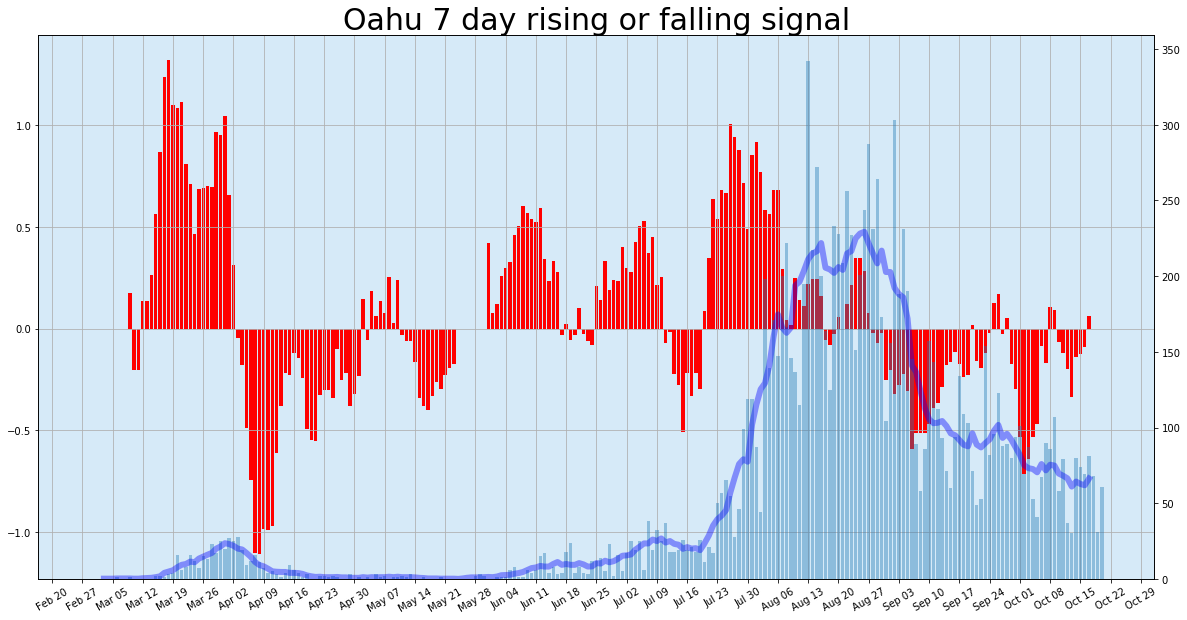

In [14]:
#plot mean and std diff

fig, ax = plt.subplots(figsize=(20,10))

ax1 = ax.twinx()  

ax1.plot(dfRpt.index, dfRpt['mean'].shift(-3),color='blue', linewidth=6, zorder=1, alpha =0.4, label="7 day mean")
ax1.bar(dfRpt.index, dfRpt['Oahu'],alpha=0.4)
ax.bar(dfRpt.index, dfRpt['rolling diff pct std'].shift(-3),color='red', label="7 day std diff")      
#ax.bar(dfRising.index,dfRising['signal'],color='red',label='rising 7 day')
#ax.bar(dfFalling.index,dfFalling['signal'],color='green',label='falling 7 day')

ax.set_facecolor('#d6eaf8')

ax1.set_ylim(ymin=0)

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.TH))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

#rotate x axis labels
#plt.xticks(rotation=45)
ax.tick_params(axis='x', labelrotation=30)
plt.title('Oahu 7 day rising or falling signal', fontdict = {'fontsize' : 30})
#grid
ax.grid()
#ax.legend(loc='upper right');
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('publish/rfSignal.png');

In [15]:
#def regession line NB: polyfit can fit higher orders. Same technique could be used for np.interpolate
#df_samp = df.loc['2020-9-24':,['Oahu']]
#x = np.arange(df_samp.index.size) # = array([0, 1, 2, ..., 3598, 3599, 3600])
#fit = np.polyfit(x, df_samp['Oahu'], 1)
#fit_fn = np.poly1d(fit)

In [16]:
df["combined_mean"] = np.nan
df["combined_mean"] = (df["Oahu"].rolling(window=7,center=True).mean() + df["Oahu"].rolling(window=14, center=True).mean())/2
#df["combined_mean"].interpolate(method='slinear',fill_value='extrapolate',inplace=True)

df["smooth"] = np.nan
df["smooth"] = df["Oahu"].ewm(span=7).mean().rolling(window=7).mean().shift(-4)
df["smooth"].interpolate(method='slinear',fill_value='extrapolate',inplace=True) 

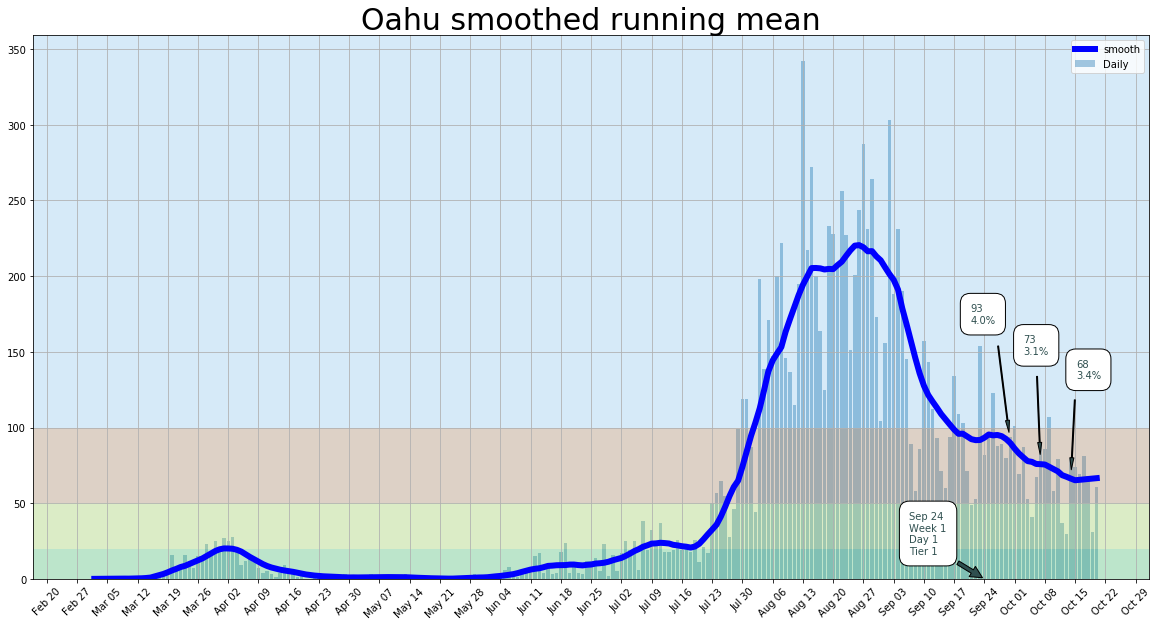

In [17]:
#plot data
fig, ax = plt.subplots(figsize=(20,10))
dSeries = df['Oahu']

ax.bar(df.index, dSeries, label="Daily", alpha=0.4)

ax.plot(df.index,df["smooth"], color='blue', linewidth=6, label='smooth')

#plot some areas for school guidence
ax.axhspan(0.0, 20, facecolor='#56d217',zorder=1,alpha=0.2)
ax.axhspan(20, 50, facecolor='#f0f502',zorder=1,alpha=0.2)
ax.axhspan(50, 100, facecolor='#fe7000',zorder=1,alpha=0.2)

ax.set_facecolor('#d6eaf8')

#plot regression line
#ax.plot(df_samp.index, fit_fn(x), color='yellow', linewidth=2, label='regression')

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.TH))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#rotate x axis labels
plt.xticks(rotation=45)
#grid
ax.grid()
ax.legend()

ax.annotate('Sep 24\nWeek 1\nDay 1\nTier 1',(pd.to_datetime('2020-9-24'),0), 
                xytext=(-75,25), textcoords='offset points',
                family='sans-serif', fontsize=10, color='darkslategrey',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'),
                arrowprops=dict(facecolor='darkslategrey', shrink=0.05,alpha=1),)

ax.annotate('93\n4.0%',(pd.to_datetime('2020-9-30'),df['smooth']['2020-9-30']), 
                xytext=(-40,120), textcoords='offset points',
                family='sans-serif', fontsize=10, color='darkslategrey',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'),
                arrowprops=dict(facecolor='darkslategrey', shrink=0.09,alpha=1,width=1,headwidth=4),)
ax.annotate('73\n3.1%',(pd.to_datetime('2020-10-7'),df['smooth']['2020-10-7']), 
                xytext=(-17,110), textcoords='offset points',
                family='sans-serif', fontsize=10, color='darkslategrey',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'),
                arrowprops=dict(facecolor='darkslategrey', shrink=0.09,alpha=1,width=1,headwidth=4),)
ax.annotate('68\n3.4%',(pd.to_datetime('2020-10-14'),df['smooth']['2020-10-14']), 
                xytext=(5,100), textcoords='offset points',
                family='sans-serif', fontsize=10, color='darkslategrey',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'),
                arrowprops=dict(facecolor='darkslategrey', shrink=0.09,alpha=1,width=1,headwidth=4),)

plt.title('Oahu smoothed running mean', fontdict = {'fontsize' : 30})
#fig.canvas.draw()
fig.savefig('publish/oahu_smoothed');

In [18]:
#calculate rates in a way that makes getting descriptive stats easier
st = 14       # short term

#Back testing: subtract backTestDays from window start
#backTestDays = 0 #55 #removed -- causing bugs

#set R to average of the lt and st slopes for the last st periods
dSt = df["Oahu"].rolling(window = st).mean().tail(st+1) #todo: off by one because of the shift?
#dSt = df["Oahu"].rolling(window = st).mean()[-backTestDays-st:-backTestDays]
dStPr = dSt.shift(-1)
dStRate = dStPr / dSt

dStRate.describe()

count    14.000000
mean      0.982410
std       0.024041
min       0.944681
25%       0.957725
50%       0.990775
75%       0.998434
max       1.015756
Name: Oahu, dtype: float64

In [19]:
#for posting into the html template later -- see gloabals above and posting below -- TODO: clean

rateHtml = 'about '+'{:.2f}'.format(dStRate.mean())+ ', std = '+ '{:.2f}'.format(dStRate.std())

In [20]:
rHigh1S = dStRate.mean() + (1 * dStRate.std())
rHigh1S

1.0064516361108788

In [21]:
rHigh2S = dStRate.mean() + (2 * dStRate.std())
rHigh2S

1.0304928011944776

In [22]:
rHigh3S = dStRate.mean() + (3 * dStRate.std())
rHigh3S

1.0545339662780764

In [23]:
rLow1S = dStRate.mean() - (1 *dStRate.std())
rLow1S

0.9583693059436812

In [24]:
rLow2S = dStRate.mean() - (2 *dStRate.std())
rLow2S

0.9343281408600823

In [25]:
rLow3S = dStRate.mean() - (3 *dStRate.std())
rLow3S

0.9102869757764835

In [26]:
rMean = dStRate.mean()
rMean

0.98241047102728

In [27]:
#get a copy of the data to work with
dfWorking = df[["Oahu"]]

#calculate a value to start projecting from
#oahuInit = dfWorking.tail(st).mean()

#get dates for projected values 
oahuInit = df["Oahu"].rolling(window=7,center=True).mean()[-4]

#Start the confidence from the mean plus minus sigmas
oahuInitHigh1S = oahuInit + df["Oahu"].rolling(7, center=True).std()[-4]
oahuInitHigh2S = oahuInit + 2*(df["Oahu"].rolling(7, center=True).std()[-4])
oahuInitHigh3S = oahuInit + 3*(df["Oahu"].rolling(7, center=True).std()[-4])

oahuInitLow1S = oahuInit - df["Oahu"].rolling(7, center=True).std()[-4]
oahuInitLow2S = oahuInit - 2*(df["Oahu"].rolling(7, center=True).std()[-4])
oahuInitLow3S = oahuInit - 3*(df["Oahu"].rolling(7, center=True).std()[-4])


D = df.index.values[-4]
daysOut = 18
dates = pd.date_range(D+np.timedelta64(1, "D"), periods=daysOut, freq='D')

#create high, mean, low projections from midpoint of mean sample
highValues1S = [pow(rHigh1S,0.5)*oahuInitHigh1S]
highValues2S = [pow(rHigh2S,0.5)*oahuInitHigh2S]
highValues3S = [pow(rHigh3S,0.5)*oahuInitHigh3S]
meanValues = [pow(rMean,0.5)*oahuInit]
lowValues1S = [pow(rLow1S,0.5)*oahuInitLow1S]
lowValues2S = [pow(rLow2S,0.5)*oahuInitLow2S]
lowValues3S = [pow(rLow3S,0.5)*oahuInitLow3S]
for i in range(1,daysOut):
    highValues1S.append(highValues1S[i-1]*rHigh1S)
    highValues2S.append(highValues2S[i-1]*rHigh2S)
    highValues3S.append(highValues3S[i-1]*rHigh3S)
    meanValues.append(meanValues[i-1]*rMean)
    lowValues1S.append(lowValues1S[i-1]*rLow1S)
    lowValues2S.append(lowValues2S[i-1]*rLow2S)
    lowValues3S.append(lowValues3S[i-1]*rLow3S)


dfProjection = pd.DataFrame({"high1S":list(highValues1S),"high2S":list(highValues2S),"high3S":list(highValues3S),
                             "low1S":list(lowValues1S), "low2S":list(lowValues2S),"low3S":list(lowValues3S),
                             "mean":list(meanValues)}, index=dates)

dfProjection = dfProjection.asfreq('D')
dfWorking = dfWorking.asfreq('D')
#dfProjection = dfWorking.append(dfProjection)
dfWorking = dfWorking.join(dfProjection)
dfProjection = dfWorking.append(dfProjection.iloc[3:])
#TODO: duplicate rows!
dfProjection.tail(40)

,Oahu,high1S,high2S,high3S,low1S,low2S,low3S,mean
2020-09-26,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-27,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-28,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-29,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-01,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-02,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-03,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-04,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-05,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
rMean * oahuInit

65.11977979380828

In [29]:
#def regession line NB: polyfit can fit higher orders. Same technique could be used for np.interpolate
df_samp = df.loc['2020-9-17':,['Oahu']]
x = np.arange(df_samp.index.size) # = array([0, 1, 2, ..., 3598, 3599, 3600])
fit = np.polyfit(x, df_samp['Oahu'], 1)
fit_fn = np.poly1d(fit)
#df_samp['linreg'] = fit_fn(x) #TODO: orphaned. Extrapolate?
#linExtrap = []
#for p in range(x.size+14):
#    z = (fit[0]*p)+fit[1]
#    linExtrap.append(z)
fit_fn(np.arange(21))

array([102.54957983, 101.13659282,  99.72360581,  98.31061879,
        96.89763178,  95.48464477,  94.07165775,  92.65867074,
        91.24568373,  89.83269672,  88.4197097 ,  87.00672269,
        85.59373568,  84.18074866,  82.76776165,  81.35477464,
        79.94178762,  78.52880061,  77.1158136 ,  75.70282659,
        74.28983957])

In [30]:
dfProjection["combined_mean"] = (dfProjection['Oahu'].rolling(window=7, center=True).mean() + 
                                 dfProjection['Oahu'].rolling(window=14, center=True).mean())/2
dfProjection['mean7'] = dfProjection['Oahu'].rolling(7,center=True).mean()
dfProjection['std7'] = dfProjection['Oahu'].rolling(7,center=True).std()
#dfProjection = dfProjection.join(df['smooth'])

DatetimeIndex(['2020-09-17', '2020-09-18', '2020-09-19', '2020-09-20',
               '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24',
               '2020-09-25', '2020-09-26', '2020-09-27', '2020-09-28',
               '2020-09-29', '2020-09-30', '2020-10-01', '2020-10-02',
               '2020-10-03', '2020-10-04', '2020-10-05', '2020-10-06',
               '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-10',
               '2020-10-11', '2020-10-12', '2020-10-13', '2020-10-14',
               '2020-10-15', '2020-10-16', '2020-10-17', '2020-10-18',
               '2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22',
               '2020-10-23', '2020-10-24', '2020-10-25', '2020-10-26',
               '2020-10-27', '2020-10-28', '2020-10-29', '2020-10-30',
               '2020-10-31', '2020-11-01'],
              dtype='datetime64[ns]', freq='D')


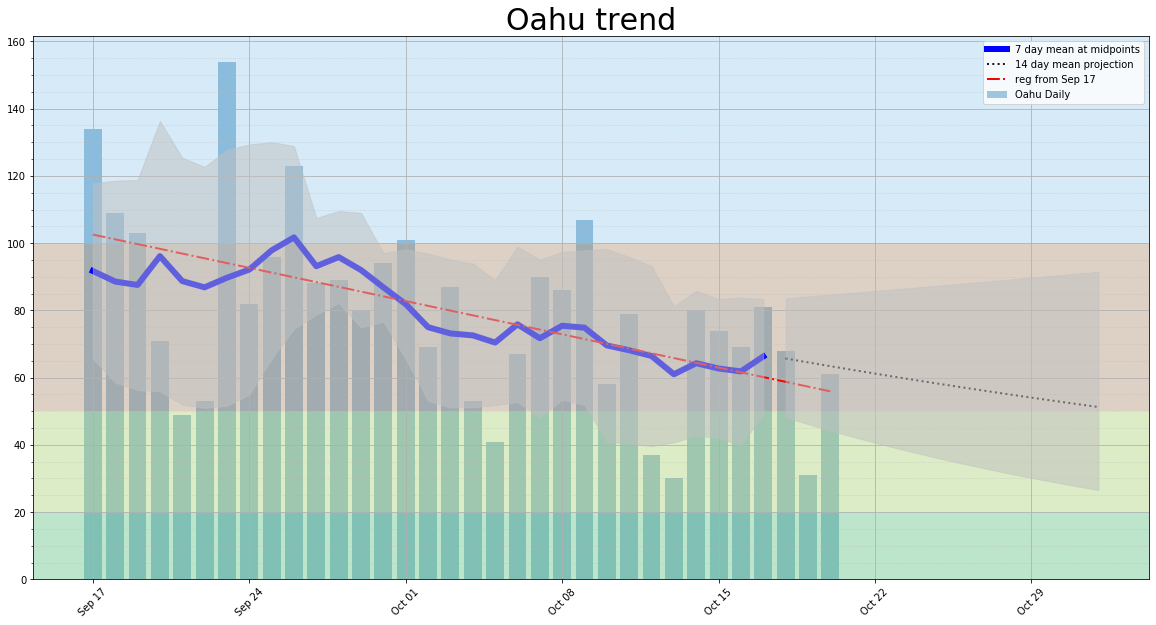

In [31]:
fig, ax = plt.subplots(figsize=(20,10))


dfGraph = (dfProjection.loc['2020-9-17':]).iloc[:-3]
print(dfGraph.index)
dfPrj = dfGraph['2020-9-17':]

ax.bar(dfGraph.index, dfGraph['Oahu'], label='Oahu Daily', alpha = 0.4)
#ax.plot(dfGraph.index,dfGraph["combined_mean"], color='green', linewidth=3, label='7, 14 mean combined')
#ax.plot(dfGraph.index,dfGraph['smooth'], color='green', linewidth = 3, label ='smoothed')
ax.fill_between(dfGraph.index,dfGraph['mean7'] + 
        dfGraph['std7'], 
        dfGraph['mean7'] - 
        dfGraph['std7'],           
        color='silver',alpha=0.5,zorder=20)

ax.plot(dfGraph.index,dfGraph['mean7'] , color='blue', linewidth=6, label="7 day mean at midpoints")
#ax.plot(dfGraph.index, dfGraph[0].rolling(window=7, center=True).mean(), color='blue', linewidth=6, label="7 day mean")
ax.plot(dfGraph.index,dfGraph["mean"], color='black', linewidth=2, label='14 day mean projection',linestyle='dotted',alpha=0.9)
#ax.plot(dfGraph.index,dfGraph["high1S"], color='yellow', linewidth=2, label='plus 3 SD')
#ax.plot(dfGraph.index,dfGraph["low1S"], color='blue', linewidth=2, label='minus 3 SD')
ax.fill_between(dfGraph.index, dfGraph["high1S"], dfGraph["low1S"], color="silver",alpha=0.5,zorder=20)
#ax.fill_between(dfGraph.index, dfGraph["high2S"], dfGraph["low2S"], color="blue",alpha=0.08)
#ax.fill_between(dfGraph.index, dfGraph["high3S"], dfGraph["low3S"], color="blue",alpha=0.08)

#plot regression line
ax.plot(df_samp.index, fit_fn(x), color='red', linewidth=2, linestyle='-.', label='reg from Sep 17')
#ax.plot(dfPrj.index, fit_fn(np.arange(dfPrj.index.size)), color='red', linewidth=2, label='reg from Sep 17')

#plot some areas for school guidence
ax.axhspan(0.0, 20, facecolor='#56d217',zorder=1,alpha=0.2)
ax.axhspan(20, 50, facecolor='#f0f502',zorder=1,alpha=0.2)
ax.axhspan(50, 100, facecolor='#fe7000',zorder=1,alpha=0.2)

ax.set_facecolor('#d6eaf8')

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.TH))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#rotate x axis labels
plt.xticks(rotation=45)

# Initialize minor ticks
ax.minorticks_on()

# Now minor ticks exist and are turned on for both axes

# Turn off x-axis minor ticks
ax.xaxis.set_tick_params(which='minor', bottom=False)

#grid
ax.grid() 
ax.grid(which='minor',axis='y',linestyle='dotted',alpha=0.5)
ax.legend(loc='upper right')

plt.title('Oahu trend', fontdict = {'fontsize' : 30})
#plt.show()
fig.savefig('publish/trend.png');

## Update index.html from Template using gloabals from above
ugh. Fix this, dude!

In [32]:
with open('publish/templates/index.html') as f:
    s = Template(f.read())
    
print(s.safe_substitute(stats=statsHtml, recs=recsHtml, rate=rateHtml),file=open('publish/index.html','w'))

In [33]:
#post the data

df.loc[:,['Statewide total','Oahu','Hawaii island','Maui','Kauai','Outside Hawaii']].to_csv("publish/daily.csv",float_format='%.0f',date_format='%m/%d/%Y')